In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt

In [2]:
# load the saved support vector classifier
svc_test = joblib.load("svc.pkl")

In [3]:
# retrieve all the nonzero coefficients and zip them with their respective indices
nonzeroes = np.nonzero(svc_test.coef_[0])[0]
coefs = zip(nonzeroes, svc_test.coef_[0][nonzeroes])

# sort the coefficients by their value, instead of index
coefs.sort(key = lambda x: x[1], reverse=True)

for coef in coefs:
    print coef

(1792420, 0.85218947279004753)
(1570048, 0.13897184215018993)
(1531647, 0.07101826706562113)
(2334997, 0.063389297515158635)
(1229091, 0.049159835227803997)
(293783, 0.032679646449947947)
(1433155, 0.026753223858570915)
(1792082, 0.026125698494587513)
(2308447, 0.015685937579652108)
(2187885, 0.011159202134989017)
(775746, 0.0094935162938324189)
(534975, 0.0079824046168976374)
(878875, 0.0077651919203948804)
(1911970, 0.00644763224661935)
(2453399, 0.0045851015236885329)
(1232530, 0.0036427454392998614)
(1986871, 0.0033388674189279476)
(767366, 0.0023888848341478836)
(926831, 0.0017415043753016325)
(1741051, 0.0012039654070636829)
(94715, 0.0008268335396941428)
(1457789, 4.9362590231390346e-05)
(624685, 4.5963492219701732e-05)
(1328446, -0.00012451282952152614)
(16763, -0.00018119710715020418)
(893241, -0.00034194716115828523)
(1430873, -0.00082506293421493447)
(1893821, -0.0018862715030827937)
(2221351, -0.0028437644874157184)
(271169, -0.0031014375873935681)
(200986, -0.0086495184795

In [8]:
# save just the coefficient values
firstCoefs = [coef[0] for coef in coefs]
indices = np.asarray(firstCoefs)

# dump the coefficients for tiling analysis
indices.dump("coefs.pkl")

In [24]:
len(coefs)

36

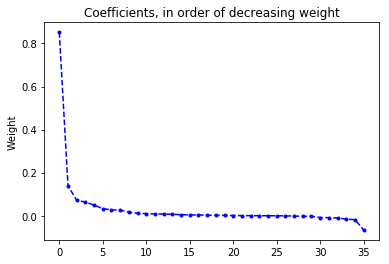

In [15]:
plt.plot([x for x in range(len(coefs))], [coef[1] for coef in coefs], '--b.')
plt.title("Coefficients, in order of decreasing weight")
plt.ylabel("Weight")
plt.savefig("Coefficients_desc", dpi=300, transparent=True)
plt.show()